# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections as cs
%matplotlib inline
# set seabor graphs to a better style
sns.set(style="ticks")


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [152]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt =  pd.read_csv(url , sep = ',', encoding='ISO-8859-1' )
online_rt.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  
5  12/1/10 8:26       7.65     17850.0  United Kingdom  
6  12/1/10 8:26       4.25     17850.0  United Kingdom  
7  12/1/10 8:28       1.85     17850.0  United Kingdom  
8  12/1/10 8:28       1.85     17850.0  United Kingdom  
9  12/1/10 8:34       1.69     13047.0  United Kingdom

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [5]:
c = online_rt.groupby('Country')
c = c.sum()
c = c.sort_values(['Quantity'], ascending=False)[1:11]
c = c.drop(['UnitPrice', 'CustomerID'], axis=1)
c.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

### Step 5.  Exclude negative Quatity entries

In [6]:
onlineRT = online_rt[(online_rt['Quantity'] > 0)]
onlineRT= onlineRT.sort_values(['Quantity'],ascending = True)
onlineRT.head(20)
#online_rt.sort_values(['Quantity'],ascending = True).head(20)


InvoiceNo StockCode                          Description  Quantity  \
122591    546884     22250  DECORATION  BUTTERFLY  MAGIC GARDEN         1   
143711    548711    85040A      S/4 PINK FLOWER CANDLES IN BOWL         1   
143712    548711     22558      CLOTHES PEGS RETROSPOT PACK 24          1   
143714    548711     21870     I CAN ONLY PLEASE ONE PERSON MUG         1   
143715    548711    84993B            75 BLACK PETIT FOUR CASES         1   
143716    548711    84993A            75 GREEN PETIT FOUR CASES         1   
143717    548711     22417       PACK OF 60 SPACEBOY CAKE CASES         1   
143718    548711     21215          IVORY PAPER CUP CAKE CASES          1   
143719    548711     84992       72 SWEETHEART FAIRY CAKE CASES         1   
143709    548711     22722    SET OF 6 SPICE TINS PANTRY DESIGN         1   
143720    548711     21975       PACK OF 60 DINOSAUR CAKE CASES         1   
143722    548711     21977   PACK OF 60 PINK PAISLEY CAKE CASES         1   
143723    548711     21976       PACK OF 60 MUSHROOM CAKE CASES         1   
143725    548711     20971     PINK BLUE FELT CRAFT TRINKET BOX         1   
143726    548711     22200             FRYING PAN PINK POLKADOT         1   
143727    548711     22201             FRYING PAN BLUE POLKADOT         1   
143728    548711     22207                FRYING PAN UNION FLAG         1   
143729    548711     84050      PINK HEART SHAPE EGG FRYING PAN         1   
143730    548711     20754      RETROSPOT RED WASHING UP GLOVES         1   
143721    548711     84991          60 TEATIME FAIRY CAKE CASES         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
122591  3/17/11 18:08       1.63         NaN  United Kingdom  
143711   4/3/11 14:24       1.65     18116.0  United Kingdom  
143712   4/3/11 14:24       1.65     18116.0  United Kingdom  
143714   4/3/11 14:24       1.25     18116.0  United Kingdom  
143715   4/3/11 14:24       0.42     18116.0  United Kingdom  
143716   4/3/11 14:24       0.42     18116.0  United Kingdom  
143717   4/3/11 14:24       0.55     18116.0  United Kingdom  
143718   4/3/11 14:24       0.55     18116.0  United Kingdom  
143719   4/3/11 14:24       0.55     18116.0  United Kingdom  
143709   4/3/11 14:24       3.95     18116.0  United Kingdom  
143720   4/3/11 14:24       0.55     18116.0  United Kingdom  
143722   4/3/11 14:24       0.55     18116.0  United Kingdom  
143723   4/3/11 14:24       0.55     18116.0  United Kingdom  
143725   4/3/11 14:24       1.25     18116.0  United Kingdom  
143726   4/3/11 14:24       4.25     18116.0  United Kingdom  
143727   4/3/11 14:24       4.25     18116.0  United Kingdom  
143728   4/3/11 14:24       4.25     18116.0  United Kingdom  
143729   4/3/11 14:24       1.65     18116.0  United Kingdom  
143730   4/3/11 14:24       2.10     18116.0  United Kingdom  
143721   4/3/11 14:24       0.55     18116.0  United Kingdom

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

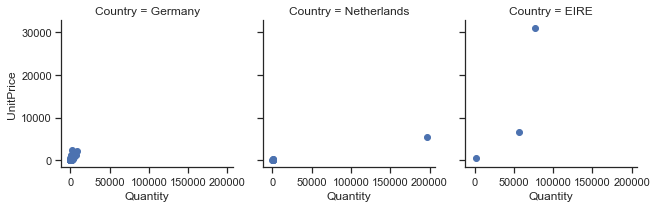

In [92]:
client = online_rt.groupby(['CustomerID','Country'])
client = client.sum()
client = client[client.UnitPrice > 0]
client['Country'] = client.index.get_level_values(1)
top =  ['Netherlands', 'EIRE', 'Germany']
client = client[client['Country'].isin(top)]
g = sns.FacetGrid(client, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend();

### BONUS: Create your own question and answer it.